In [12]:
'''
第4章：数据清洗与预处理
'''

import os
import pandas as pd
import missingno as msno
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', family='KaiTi')  # 指定字体，让matplotlib图例上能正常显示中文

warnings.filterwarnings("ignore")  # 忽略警告

df = pd.read_csv('./data/german.csv', sep=' ', header=None)
# df = pd.read_csv('./data/german.csv', delimiter=' ', header=None)
# df = pd.read_csv('./data/german.csv', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [13]:
# 变量重命名
columns_map = {
    'status_account': '现有支票账户状态',
    'duration': '期数或借款持续月份',
    'credit_history': '历史信用记录',
    'purpose': '借款目的',
    'amount': '信用额度',
    'saving_account': '储蓄账户状态',
    'present_emp': '当前就业状态',
    'income_rate': '分期付款占可支配收入的百分比',
    'personal_status': '性别与婚姻状态',
    'other_debtors': '其它担保人信息',
    'residence_info': '现居住地信息',
    'property': '财产状况',
    'age': '年龄',
    'inst_plans': '其它分期情况',
    'housing': '房产状态',
    'num_credits': '信用卡数量',
    'job': '工作状态',
    'dependents': '赡养人数',
    'telephone': '电话号码注册情况',
    'foreign_worker': '是否有国外工作经历',
    'target': '标签信息（样本真实逾期情况 1:无逾期，2:逾期）'
}
columns = ['status_account', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_account', 'present_emp', 'income_rate', 'personal_status',
           'other_debtors', 'residence_info', 'property', 'age', 'inst_plans',
           'housing', 'num_credits', 'job', 'dependents', 'telephone',
           'foreign_worker', 'target']
df.columns = columns
# 将标签变量由状态1,2转为0,1; 0表示好用户，1表示坏用户
df.target = df.target - 1
df.head()

,status_account,duration,credit_history,purpose,amount,saving_account,present_emp,income_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [14]:
df.describe()

,duration,amount,income_rate,residence_info,age,num_credits,dependents,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [15]:
# 区分离散变量与连续变量
feature_names = list(df.columns)
feature_names.remove('target')
# 先判断类型，如果是int或float就直接作为连续变量
numerical_var = list(df[feature_names].select_dtypes(
    include=['int', 'float', 'int32', 'float32', 'int64', 'float64']).columns.values)
categorical_var = [x for x in feature_names if x not in numerical_var]
numerical_var, categorical_var

(['duration',
  'amount',
  'income_rate',
  'residence_info',
  'age',
  'num_credits',
  'dependents'],
 ['status_account',
  'credit_history',
  'purpose',
  'saving_account',
  'present_emp',
  'personal_status',
  'other_debtors',
  'property',
  'inst_plans',
  'housing',
  'job',
  'telephone',
  'foreign_worker'])

<AxesSubplot:>

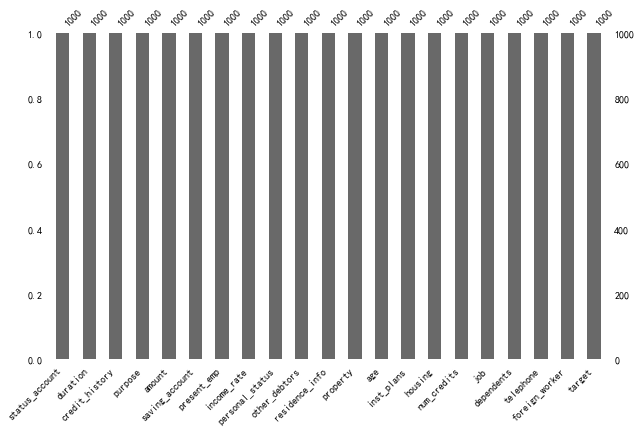

In [16]:
# 缺失值绘图
msno.bar(df, labels=True, figsize=(10, 6), fontsize=10)

In [17]:
# 添加缺失值
df.reset_index(drop=True, inplace=True)
var_name = categorical_var + numerical_var
for i in var_name:
    num = np.random.randint(low=0, high=df.shape[0] - 1)
    index_1 = np.random.randint(low=0, high=df.shape[0] - 1, size=num)
    index_1 = np.unique(index_1)
    df[i].loc[index_1] = np.nan

<AxesSubplot:>

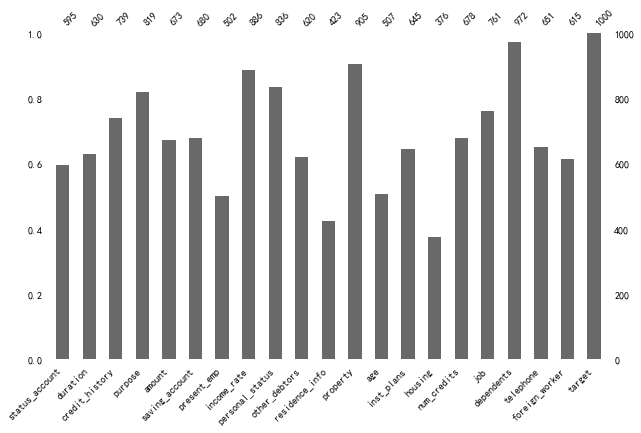

In [18]:
# 缺失值绘图
msno.bar(df, labels=True, figsize=(10, 6), fontsize=10)

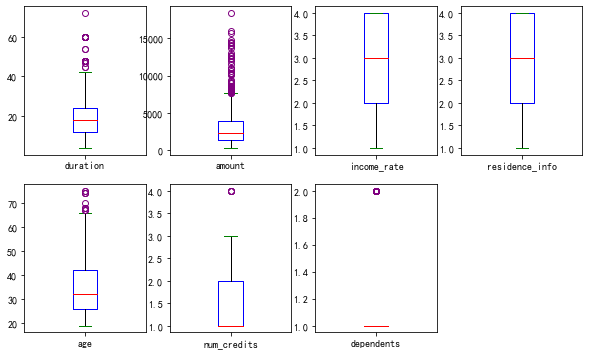

In [19]:
# 对于连续数据绘制箱线图，观察是否有异常值
plt.figure(figsize=(10, 6))  # 设置图形尺寸大小
for j in range(1, len(numerical_var) + 1):
    plt.subplot(2, 4, j)
    df_temp = df[numerical_var[j - 1]][~df[numerical_var[j - 1]].isnull()]
    plt.boxplot(df_temp,
                notch=False,  # 中位线处不设置凹陷
                widths=0.2,  # 设置箱体宽度
                medianprops={'color': 'red'},  # 中位线设置为红色
                boxprops=dict(color="blue"),  # 箱体边框设置为蓝色
                labels=[numerical_var[j - 1]],  # 设置标签
                whiskerprops={'color': "black"},  # 设置须的颜色，黑色
                capprops={'color': "green"},  # 设置箱线图顶端和末端横线的属性，颜色为绿色
                flierprops={'color': 'purple', 'markeredgecolor': "purple"}  # 异常值属性，这里没有异常值，所以没表现出来
                )
plt.show()

In [20]:
df.head()

,status_account,duration,credit_history,purpose,amount,saving_account,present_emp,income_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target
0,A11,6.0,NaN,NaN,1169.0,NaN,A75,4.0,A93,NaN,...,A121,67.0,A143,A152,NaN,A173,1.0,A192,NaN,0
1,A12,48.0,NaN,A43,5951.0,A61,NaN,2.0,A92,A101,...,A121,NaN,A143,NaN,NaN,A173,1.0,A191,NaN,1
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,NaN,A101,...,A121,NaN,A143,NaN,NaN,A172,2.0,A191,A201,0
3,A11,42.0,A32,NaN,7882.0,A61,NaN,2.0,NaN,NaN,...,A122,45.0,A143,NaN,1.0,A173,2.0,A191,NaN,0
4,NaN,24.0,A33,A40,4870.0,A61,NaN,3.0,A93,A101,...,A124,53.0,NaN,A153,2.0,A173,2.0,A191,NaN,1


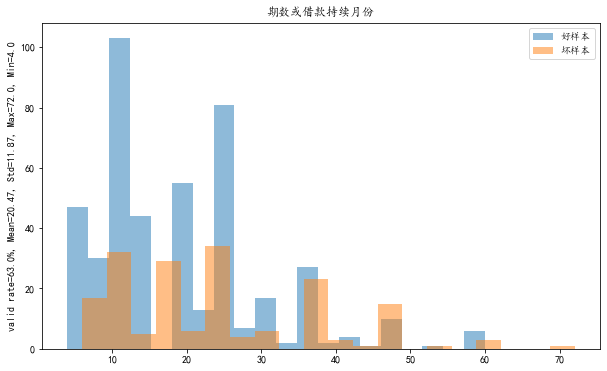

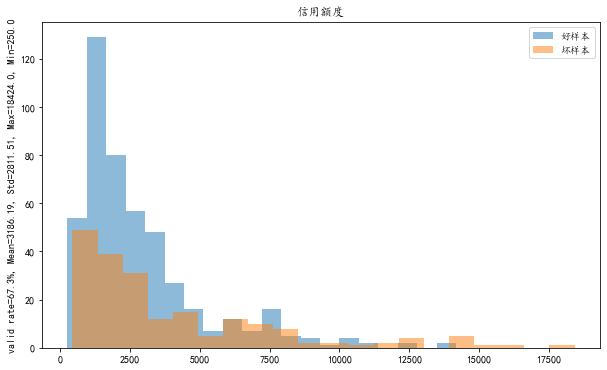

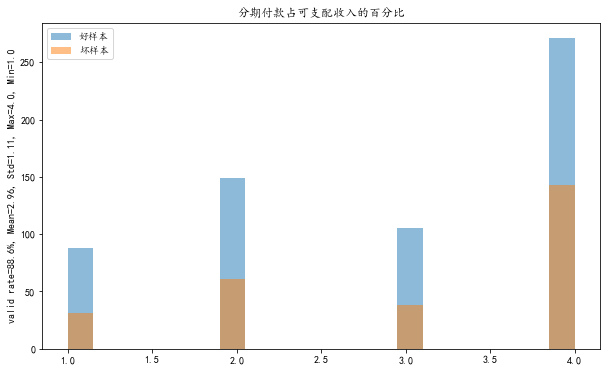

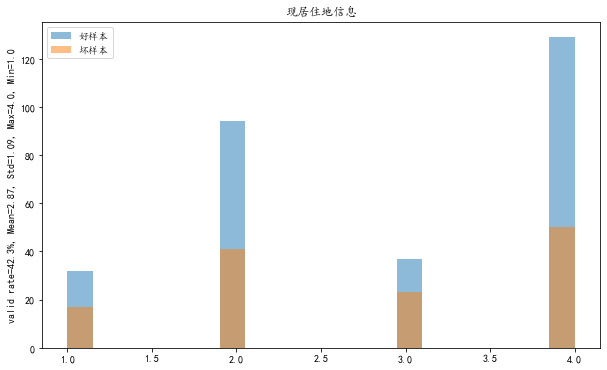

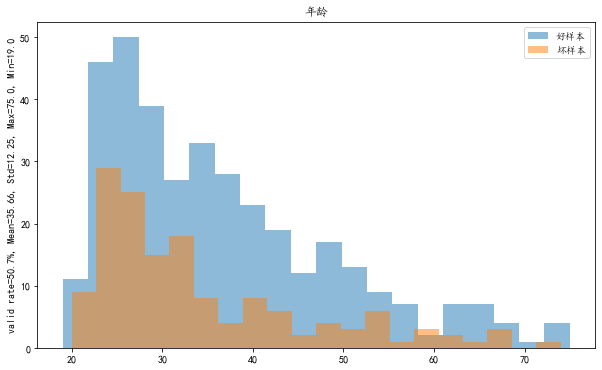

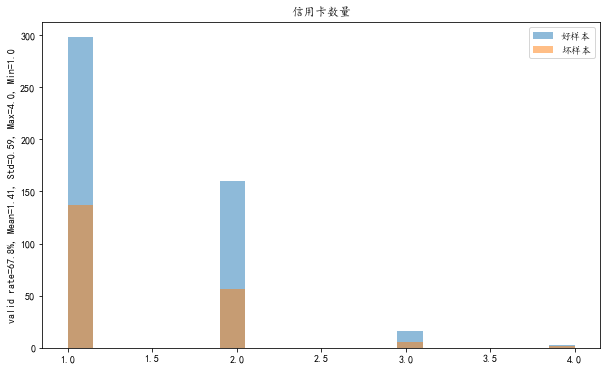

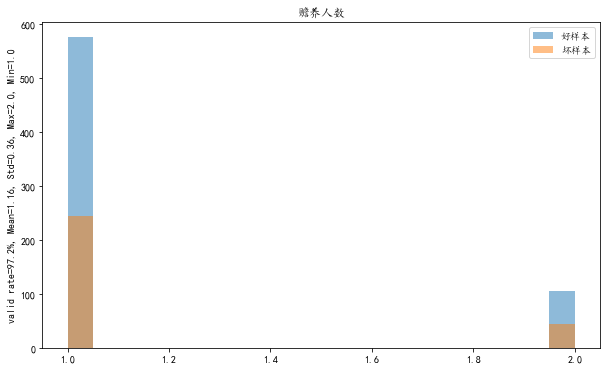

In [21]:
# 查看数据分布
# 连续变量不同类别下的分布
for i in numerical_var:
    ##取非缺失值的数据
    df_temp = df.loc[~df[i].isnull(), [i, 'target']]
    df_good = df_temp[df_temp.target == 0]
    df_bad = df_temp[df_temp.target == 1]
    ##计算统计量
    valid = round(df_temp.shape[0] / df.shape[0] * 100, 2)
    Mean = round(df_temp[i].mean(), 2)
    Std = round(df_temp[i].std(), 2)
    Max = round(df_temp[i].max(), 2)
    Min = round(df_temp[i].min(), 2)
    ##绘图
    plt.figure(figsize=(10, 6))
    fontsize_1 = 12
    plt.hist(df_good[i], bins=20, alpha=0.5, label='好样本')
    plt.hist(df_bad[i], bins=20, alpha=0.5, label='坏样本')
    plt.title(columns_map[i], fontsize=fontsize_1)
    plt.ylabel('valid rate=' + str(valid) + '%, Mean=' + str(Mean) + ', Std=' + str(Std) + ', Max=' + str(
        Max) + ', Min=' + str(Min))
    plt.legend()
    ##保存图片
    # file = os.path.join('../chapter4', i + '.png')
    # plt.savefig(file)
    # plt.close(1)

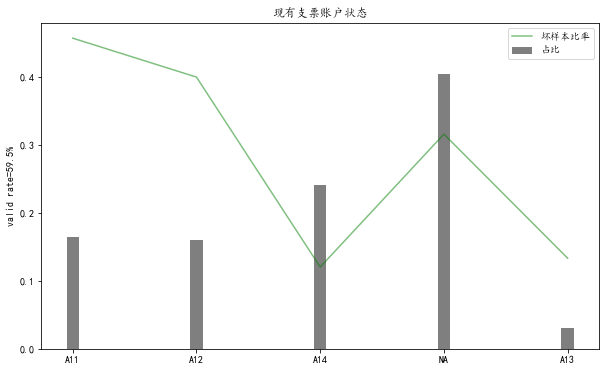

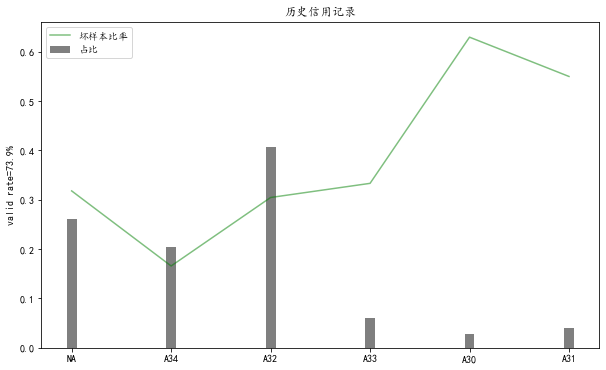

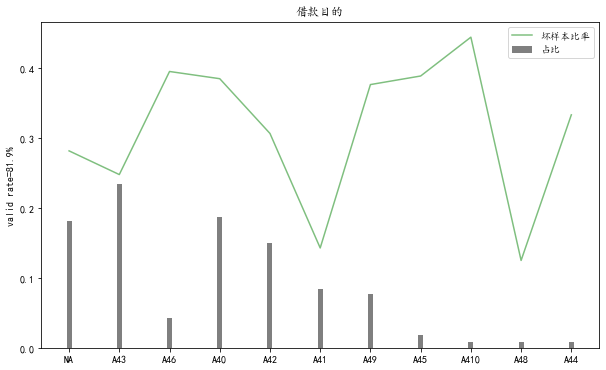

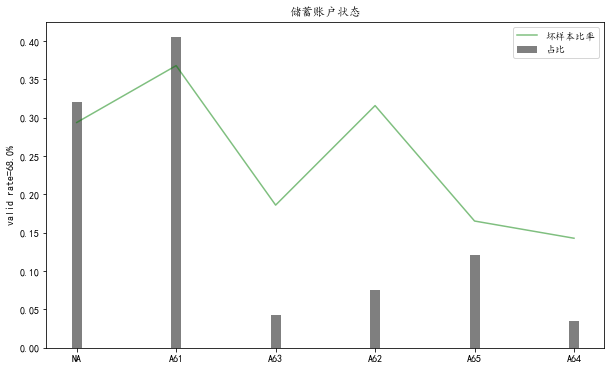

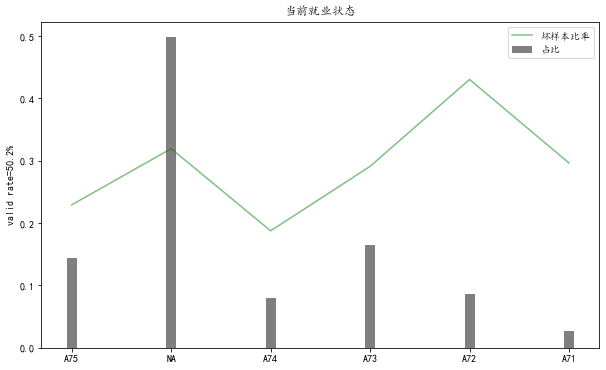

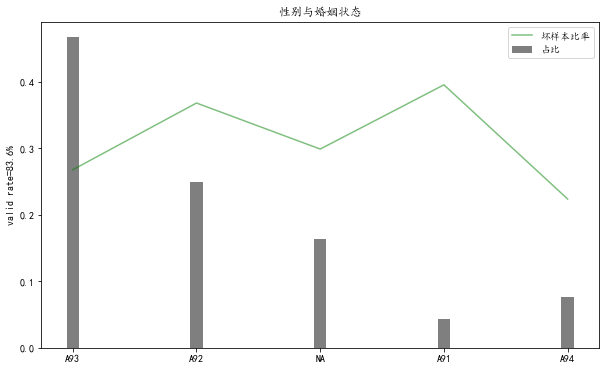

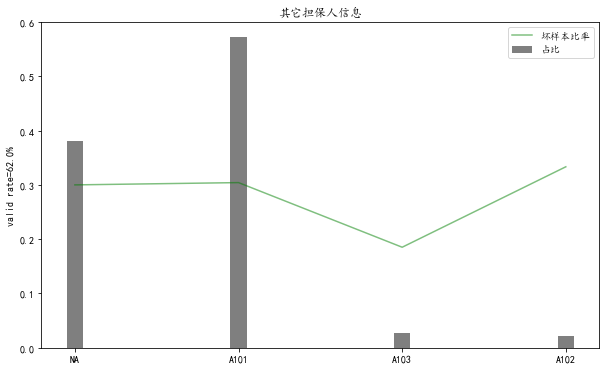

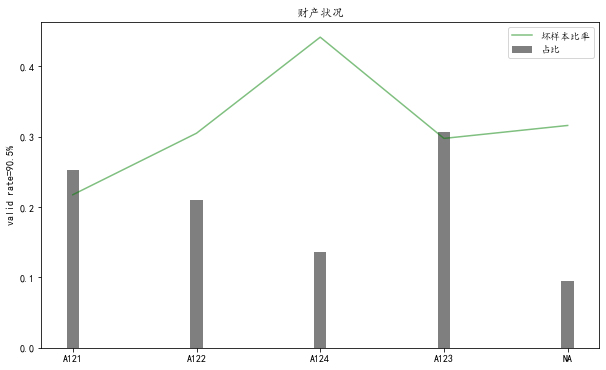

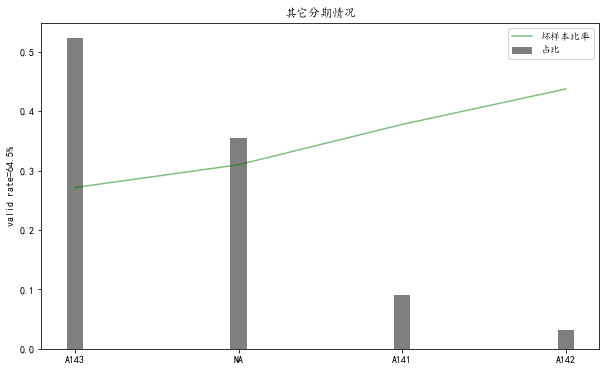

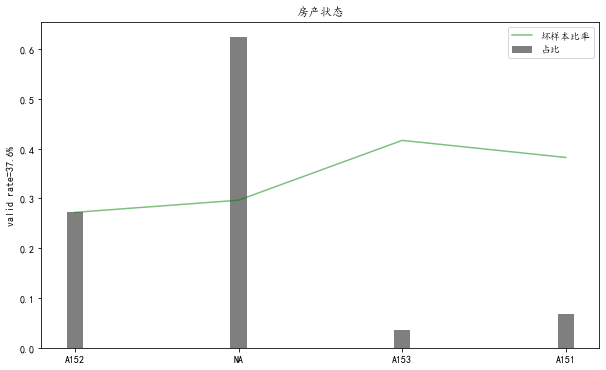

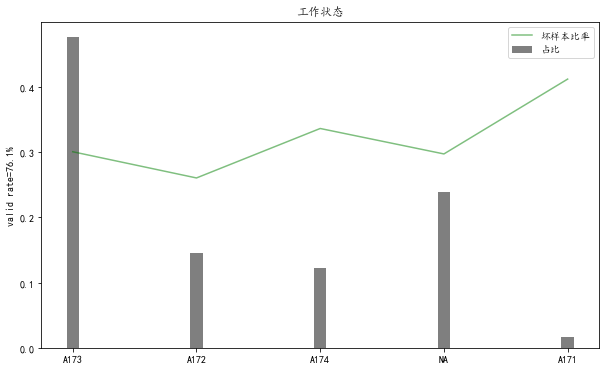

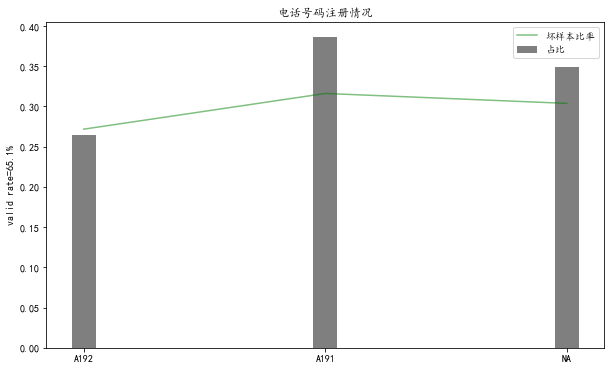

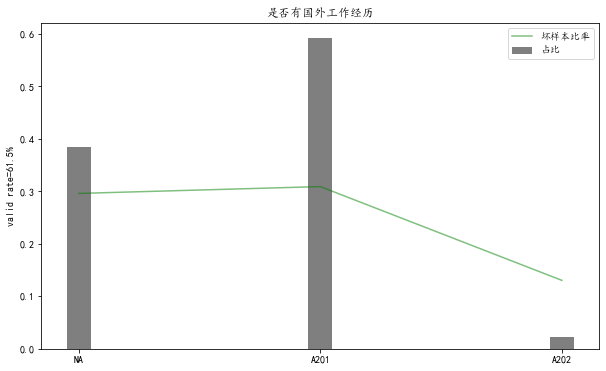

In [22]:
# 离散变量不同类别下的分布
for i in categorical_var:
    ##非缺失值数据
    df_temp = df.loc[~df[i].isnull(), [i, 'target']]
    df_bad = df_temp[df_temp.target == 1]
    valid = round(df_temp.shape[0] / df.shape[0] * 100, 2)

    bad_rate = []
    bin_rate = []
    var_name = []
    for j in df[i].unique():
        if pd.isnull(j):
            df_1 = df[df[i].isnull()]
            bad_rate.append(sum(df_1.target) / df_1.shape[0])
            bin_rate.append(df_1.shape[0] / df.shape[0])
            var_name.append('NA')
        else:
            df_1 = df[df[i] == j]
            bad_rate.append(sum(df_1.target) / df_1.shape[0])
            bin_rate.append(df_1.shape[0] / df.shape[0])
            var_name.append(j)
    df_2 = pd.DataFrame({'var_name': var_name, 'bin_rate': bin_rate, 'bad_rate': bad_rate})
    ##绘图
    plt.figure(figsize=(10, 6))
    fontsize_1 = 12
    plt.bar(np.arange(1, df_2.shape[0] + 1), df_2.bin_rate, 0.1, color='black', alpha=0.5, label='占比')
    plt.xticks(np.arange(1, df_2.shape[0] + 1), df_2.var_name)
    plt.plot(np.arange(1, df_2.shape[0] + 1), df_2.bad_rate, color='green', alpha=0.5, label='坏样本比率')

    plt.title(columns_map[i], fontsize=fontsize_1)
    plt.ylabel('valid rate=' + str(valid) + '%')
    plt.legend()
    ##保存图片
    # file = os.path.join('../chapter4', i + '.png')
    # plt.savefig(file)
    # plt.close(1)